In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose, LeakyReLU
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

/var/folders/4z/y73s3mws6s17sr1f9h2w5hhw0000gn/T/ipykernel_1373/3703244367.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Face_Train_Data = Path("/Users/palashshah/Downloads/Dataset/test")
Face_Test_Data = Path("/Users/palashshah/Downloads/Dataset/test")

In [15]:
import os


train_data_dir = '/Users/palashshah/Downloads/Dataset/train'
test_data_dir = '/Users/palashshah/Downloads/Dataset/test'


def collect_paths_and_labels(data_dir):
    image_paths = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for image_file in os.listdir(label_dir):
                if image_file.endswith('.png'):
                    image_path = os.path.join(label_dir, image_file)
                    image_paths.append(image_path)
                    labels.append(label)
    return image_paths, labels


Train_PNG_Path, Train_PNG_Labels = collect_paths_and_labels(train_data_dir)
Test_PNG_Path, Test_PNG_Labels = collect_paths_and_labels(test_data_dir)


label_counts = {}
for label in set(Train_PNG_Labels):
    label_counts[label] = Train_PNG_Labels.count(label)


for label, count in label_counts.items():
    print(f"{label}: {count} images")


neutral: 5572 images
anger: 4462 images
sadness: 5483 images
surprise: 3586 images
fear: 4593 images
disgust: 492 images
happiness: 8110 images


In [16]:
print("anger: ",Train_PNG_Labels.count("anger"))
print("disgust: ",Train_PNG_Labels.count("disgust"))
print("fear: ",Train_PNG_Labels.count("fear"))
print("happiness: ",Train_PNG_Labels.count("happiness"))
print("neutral: ",Train_PNG_Labels.count("neutral"))
print("sadness: ",Train_PNG_Labels.count("sadness"))
print("surprise: ",Train_PNG_Labels.count("surprise"))

anger:  4462
disgust:  492
fear:  4593
happiness:  8110
neutral:  5572
sadness:  5483
surprise:  3586


In [17]:
Train_PNG_Path_Series = pd.Series(Train_PNG_Path,name="PNG").astype(str)
Test_PNG_Path_Series = pd.Series(Test_PNG_Path,name="PNG").astype(str)

In [18]:
Train_PNG_Labels_Series = pd.Series(Train_PNG_Labels,name="CATEGORY")
Test_PNG_Labels_Series = pd.Series(Test_PNG_Labels,name="CATEGORY")

In [19]:
Main_Train_Data = pd.concat([Train_PNG_Path_Series,Train_PNG_Labels_Series],axis=1)
Main_Test_Data = pd.concat([Test_PNG_Path_Series,Test_PNG_Labels_Series],axis=1)

In [20]:
print(Main_Train_Data.head(-1))

                                                     PNG CATEGORY
0      /Users/palashshah/Downloads/Dataset/train/fear...     fear
1      /Users/palashshah/Downloads/Dataset/train/fear...     fear
2      /Users/palashshah/Downloads/Dataset/train/fear...     fear
3      /Users/palashshah/Downloads/Dataset/train/fear...     fear
4      /Users/palashshah/Downloads/Dataset/train/fear...     fear
...                                                  ...      ...
32292  /Users/palashshah/Downloads/Dataset/train/disg...  disgust
32293  /Users/palashshah/Downloads/Dataset/train/disg...  disgust
32294  /Users/palashshah/Downloads/Dataset/train/disg...  disgust
32295  /Users/palashshah/Downloads/Dataset/train/disg...  disgust
32296  /Users/palashshah/Downloads/Dataset/train/disg...  disgust

[32297 rows x 2 columns]


In [21]:
print(Main_Test_Data.head(-1))

                                                    PNG CATEGORY
0     /Users/palashshah/Downloads/Dataset/test/fear/...     fear
1     /Users/palashshah/Downloads/Dataset/test/fear/...     fear
2     /Users/palashshah/Downloads/Dataset/test/fear/...     fear
3     /Users/palashshah/Downloads/Dataset/test/fear/...     fear
4     /Users/palashshah/Downloads/Dataset/test/fear/...     fear
...                                                 ...      ...
3583  /Users/palashshah/Downloads/Dataset/test/disgu...  disgust
3584  /Users/palashshah/Downloads/Dataset/test/disgu...  disgust
3585  /Users/palashshah/Downloads/Dataset/test/disgu...  disgust
3586  /Users/palashshah/Downloads/Dataset/test/disgu...  disgust
3587  /Users/palashshah/Downloads/Dataset/test/disgu...  disgust

[3588 rows x 2 columns]


In [22]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [23]:
print(Main_Train_Data.head(-1))

                                                     PNG   CATEGORY
0      /Users/palashshah/Downloads/Dataset/train/neut...    neutral
1      /Users/palashshah/Downloads/Dataset/train/sadn...    sadness
2      /Users/palashshah/Downloads/Dataset/train/happ...  happiness
3      /Users/palashshah/Downloads/Dataset/train/surp...   surprise
4      /Users/palashshah/Downloads/Dataset/train/fear...       fear
...                                                  ...        ...
32292  /Users/palashshah/Downloads/Dataset/train/ange...      anger
32293  /Users/palashshah/Downloads/Dataset/train/neut...    neutral
32294  /Users/palashshah/Downloads/Dataset/train/fear...       fear
32295  /Users/palashshah/Downloads/Dataset/train/sadn...    sadness
32296  /Users/palashshah/Downloads/Dataset/train/happ...  happiness

[32297 rows x 2 columns]


In [24]:
print(Main_Test_Data.head(-1))

                                                    PNG  CATEGORY
0     /Users/palashshah/Downloads/Dataset/test/fear/...      fear
1     /Users/palashshah/Downloads/Dataset/test/fear/...      fear
2     /Users/palashshah/Downloads/Dataset/test/disgu...   disgust
3     /Users/palashshah/Downloads/Dataset/test/surpr...  surprise
4     /Users/palashshah/Downloads/Dataset/test/fear/...      fear
...                                                 ...       ...
3583  /Users/palashshah/Downloads/Dataset/test/neutr...   neutral
3584  /Users/palashshah/Downloads/Dataset/test/sadne...   sadness
3585  /Users/palashshah/Downloads/Dataset/test/surpr...  surprise
3586  /Users/palashshah/Downloads/Dataset/test/neutr...   neutral
3587  /Users/palashshah/Downloads/Dataset/test/anger...     anger

[3588 rows x 2 columns]


In [25]:
plt.style.use("classic")

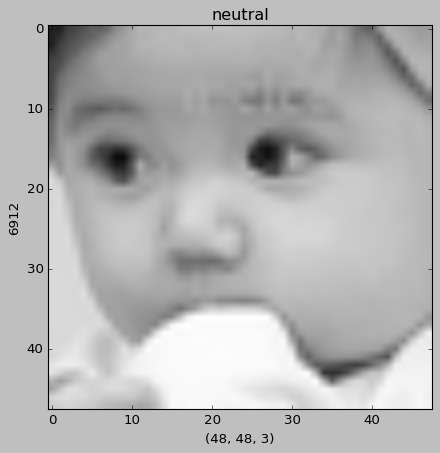

In [26]:
Example_IMG = cv2.imread(Main_Train_Data["PNG"][0])
plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][0])
plt.imshow(Example_IMG)

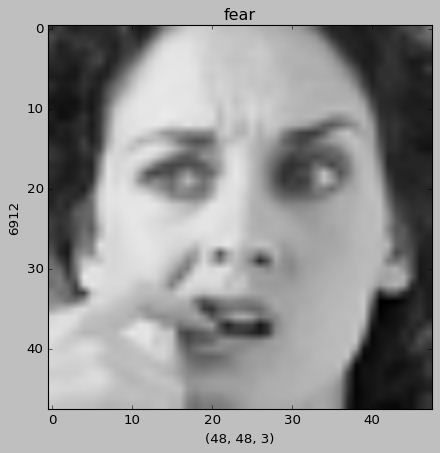

In [27]:
Example_IMG = cv2.imread(Main_Train_Data["PNG"][20])
plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][20])
plt.imshow(Example_IMG)

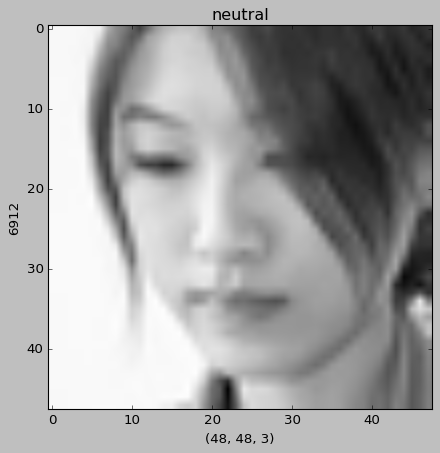

In [28]:
Example_IMG = cv2.imread(Main_Train_Data["PNG"][3228])
plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][3228])
plt.imshow(Example_IMG)

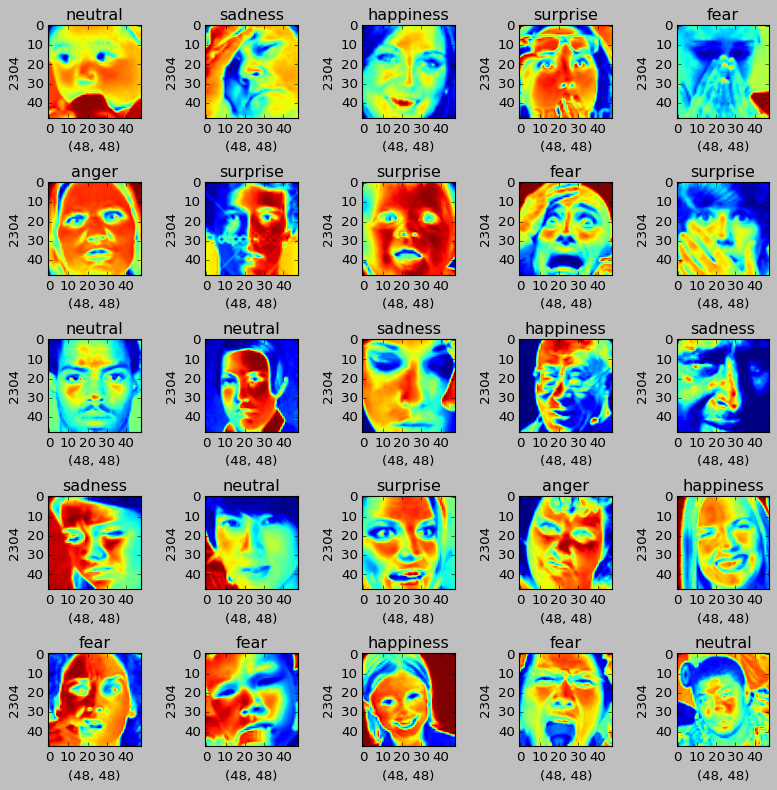

In [29]:
figure, axes = plt.subplots(nrows=5,ncols=5,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    IMGs = plt.imread(Main_Train_Data["PNG"][i])
    ax.imshow(IMGs)
    ax.set_xlabel(IMGs.shape)
    ax.set_ylabel(IMGs.size)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

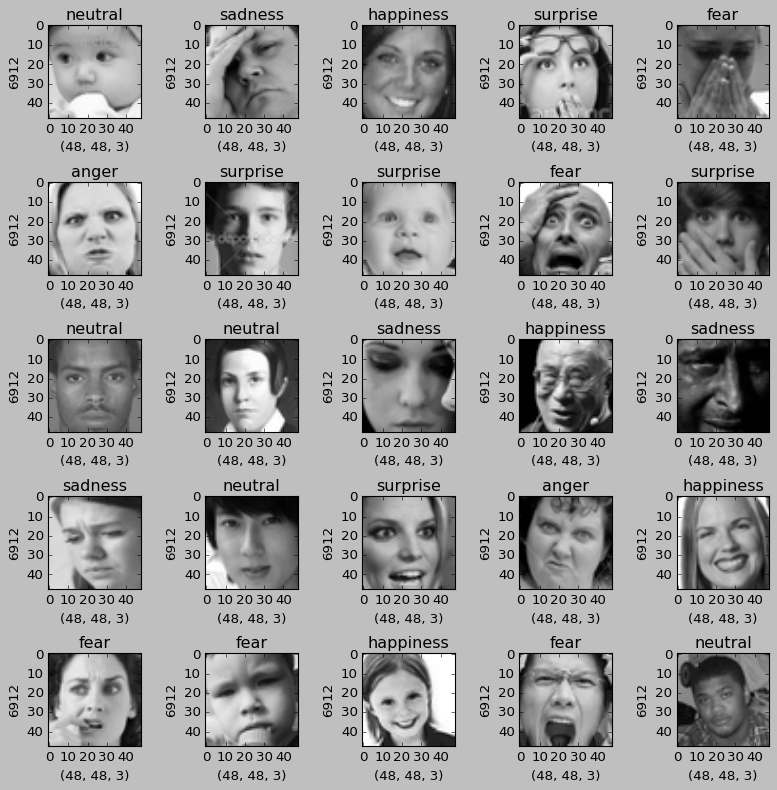

In [30]:
figure, axes = plt.subplots(nrows=5,ncols=5,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    IMGs = cv2.imread(Main_Train_Data["PNG"][i])
    ax.imshow(IMGs)
    ax.set_xlabel(IMGs.shape)
    ax.set_ylabel(IMGs.size)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

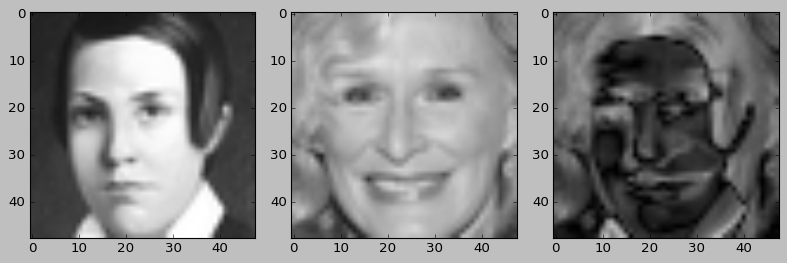

In [31]:
Ex_I_Img = Main_Train_Data["PNG"][11]
Ex_II_Img = Main_Test_Data["PNG"][2333]

I_Img = cv2.imread(Ex_I_Img)
II_Img = cv2.imread(Ex_II_Img)

Diff_Img = cv2.absdiff(I_Img,II_Img)

IMGs_List = [I_Img,II_Img,Diff_Img]

#

figure, axis = plt.subplots(nrows=1,
                           ncols=3,
                           figsize=(10,10))


for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List[i])
plt.tight_layout()
plt.show()

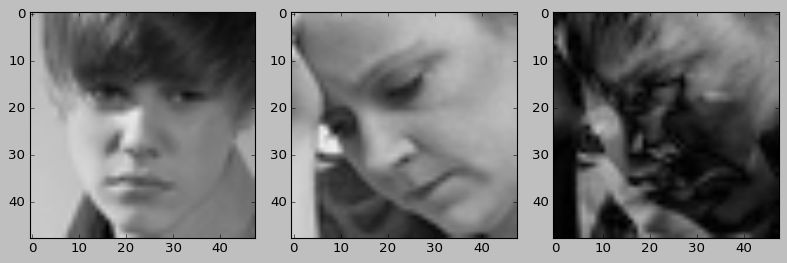

In [32]:
Ex_I_Img = Main_Train_Data["PNG"][1100]
Ex_II_Img = Main_Test_Data["PNG"][23]

I_Img = cv2.imread(Ex_I_Img)
II_Img = cv2.imread(Ex_II_Img)

Diff_Img = cv2.absdiff(I_Img,II_Img)

IMGs_List = [I_Img,II_Img,Diff_Img]

#

figure, axis = plt.subplots(nrows=1,
                           ncols=3,
                           figsize=(10,10))


for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List[i])
plt.tight_layout()
plt.show()

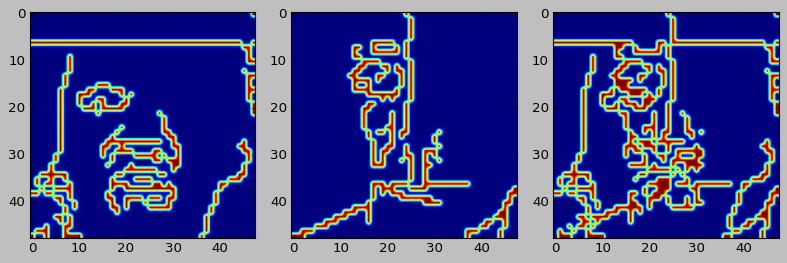

In [33]:
Ex_I_Img = Main_Train_Data["PNG"][110]
Ex_II_Img = Main_Test_Data["PNG"][452]

I_Img = cv2.imread(Ex_I_Img)
II_Img = cv2.imread(Ex_II_Img)
I_Img = cv2.cvtColor(I_Img,cv2.COLOR_BGR2RGB)
II_Img = cv2.cvtColor(II_Img,cv2.COLOR_BGR2RGB)

I_Img_Canny = cv2.Canny(I_Img,90,400)
II_Img_Canny = cv2.Canny(II_Img,90,400)

Diff_Canny = cv2.absdiff(I_Img_Canny,II_Img_Canny)

IMGs_List = [I_Img_Canny,II_Img_Canny,Diff_Canny]

#

figure, axis = plt.subplots(nrows=1,
                           ncols=3,
                           figsize=(10,10))


for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List[i])
plt.tight_layout()
plt.show()

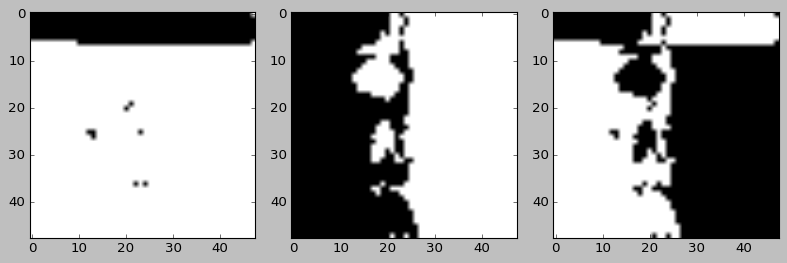

In [34]:
Ex_I_Img = Main_Train_Data["PNG"][110]
Ex_II_Img = Main_Test_Data["PNG"][452]

I_Img = cv2.imread(Ex_I_Img)
II_Img = cv2.imread(Ex_II_Img)
I_Img = cv2.cvtColor(I_Img,cv2.COLOR_BGR2RGB)
II_Img = cv2.cvtColor(II_Img,cv2.COLOR_BGR2RGB)

ret,threshold_I = cv2.threshold(I_Img,180,255,cv2.THRESH_BINARY_INV)
ret,threshold_II = cv2.threshold(II_Img,180,255,cv2.THRESH_BINARY_INV)

Diff_Thresh = cv2.absdiff(threshold_I,threshold_II)

IMGs_List = [threshold_I,threshold_II,Diff_Thresh]

#

figure, axis = plt.subplots(nrows=1,
                           ncols=3,
                           figsize=(10,10))


for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List[i])
plt.tight_layout()
plt.show()

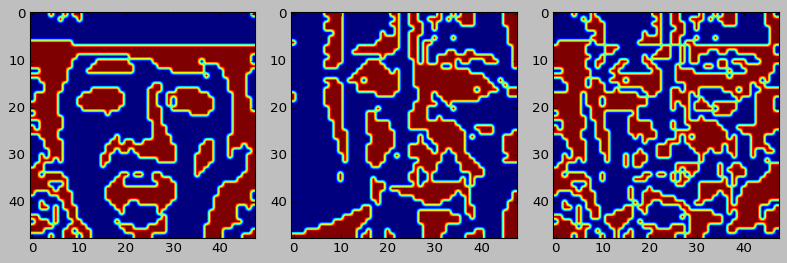

In [35]:
Ex_I_Img = Main_Train_Data["PNG"][110]
Ex_II_Img = Main_Test_Data["PNG"][452]

I_Img = cv2.imread(Ex_I_Img,0)
II_Img = cv2.imread(Ex_II_Img,0)


thresh_A_I = cv2.adaptiveThreshold(I_Img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)
thresh_A_II = cv2.adaptiveThreshold(II_Img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,11,2)

Diff_Thresh_A = cv2.absdiff(thresh_A_I,thresh_A_II)

IMGs_List = [thresh_A_I,thresh_A_II,Diff_Thresh_A]

#

figure, axis = plt.subplots(nrows=1,
                           ncols=3,
                           figsize=(10,10))


for i, ax in enumerate(axis.flat):
    ax.imshow(IMGs_List[i])
plt.tight_layout()
plt.show()

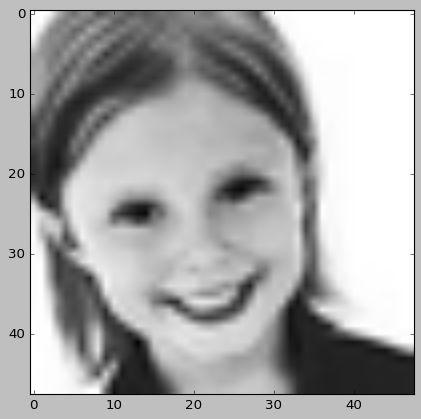

In [36]:
xi = Main_Train_Data["PNG"][22]
xp = cv2.imread(xi)
plt.imshow(xp)

In [37]:
Transformated_IMG_List = []

for T_Img in Main_Train_Data["PNG"]:
    X_Img = cv2.imread(T_Img,0)
    X_Img = cv2.resize(X_Img,(48,48)) #32,32
    Transformated_IMG_List.append(X_Img)

In [38]:
print(Transformated_IMG_List[2].shape)

(48, 48)


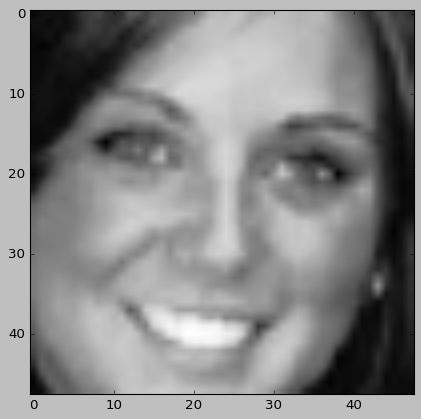

In [39]:
plt.imshow(Transformated_IMG_List[2],cmap="Greys_r")

In [40]:
Array_IMG_Set = np.asarray(Transformated_IMG_List)
print(Array_IMG_Set.shape)
Array_IMG_Set = Array_IMG_Set.reshape(-1,48,48,3)
print(Array_IMG_Set.shape)

(32298, 48, 48)
(10766, 48, 48, 3)


In [41]:
Generator_Input = keras.Input(shape=(48,)) #32
x = layers.Dense(128*24*24)(Generator_Input) #16,16
x = layers.LeakyReLU()(x)
x = layers.Reshape((24,24,128))(x) #16,16

x = layers.Conv2D(256,5,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256,4,strides=2,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,5,padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(3,7,padding="same",activation="tanh")(x)

Generator = keras.models.Model(Generator_Input,x)

In [42]:
print(Generator.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48)]              0         
                                                                 
 dense (Dense)               (None, 73728)             3612672   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 73728)             0         
                                                                 
 reshape (Reshape)           (None, 24, 24, 128)       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 256)       819456    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 48, 48, 256)       104883

In [43]:
Discriminator_Input = layers.Input(shape=(48,48,3)) #32,32
x = layers.Conv2D(128,3)(Discriminator_Input)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,3,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,3,strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dense(1,activation="sigmoid")(x)

Discriminator = keras.models.Model(Discriminator_Input,x)

In [44]:
print(Discriminator.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       3584      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 46, 46, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 22, 22, 128)       262272    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 22, 22, 128)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       262272    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 10, 10, 128)       0   

In [48]:
from tensorflow.keras.optimizers import legacy as legacy_optimizers


optimizer = legacy_optimizers.RMSprop(learning_rate=0.0004, clipvalue=1.0, decay=1e-8)


Discriminator.compile(optimizer=optimizer, loss="binary_crossentropy")


In [49]:
Discriminator.trainable = False

Gan_Input = keras.Input(shape=(48,))
Gan_Output = Discriminator(Generator(Gan_Input))
GAN_Model = keras.models.Model(Gan_Input,Gan_Output)

In [52]:
from tensorflow.keras.optimizers import legacy as legacy_optimizers


optimizer = legacy_optimizers.RMSprop(learning_rate=0.0002, clipvalue=1.0, decay=1e-8)


GAN_Model.compile(optimizer=optimizer, loss="binary_crossentropy")


In [53]:
print(GAN_Model.layers)

[<keras.src.engine.input_layer.InputLayer object at 0x29e1a7b10>, <keras.src.engine.functional.Functional object at 0x29e2d4b90>, <keras.src.engine.functional.Functional object at 0x2a30dd3d0>]


In [54]:
os.mkdir("face_new")

In [55]:
start = 0
batch_size = 32
iterations = 10000
for step in range(iterations):
    random_noise_vector = np.random.normal(size=(batch_size,48)) #32
    generation_images = Generator.predict(random_noise_vector)
    
    stop = start + batch_size
    real_images = Array_IMG_Set[start:stop]
    
    combined_images = np.concatenate([generation_images,real_images])
    
    labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])
    labels += 0.05 * np.random.random(labels.shape)
    
    D_loss = Discriminator.train_on_batch(combined_images,labels)
    
    random_noise_vector = np.random.normal(size=(batch_size,48)) #32
    
    misleading_targets = np.zeros((batch_size,1))
    
    a_loss = GAN_Model.train_on_batch(random_noise_vector,misleading_targets)
    
    start += batch_size
    
    if start > len(Array_IMG_Set) - batch_size:
        start = 0
    
    if step % 100 == 0:
        GAN_Model.save_weights("GAN_ONE.h5")
        
        print("DISC_LOSS: ", D_loss)
        print("ADVERSARIAL_LOSS: ", a_loss)
        
        Img = image.array_to_img(generation_images[0] * 255.,scale=False)
        Img.save(os.path.join("./face_new","FAKE_FACES"+str(step)+".png"))
        
        Img = image.array_to_img(real_images[0] * 255.,scale=False)
        Img.save(os.path.join("./face_new","REAL_FACES"+str(step)+".png"))

1/1 [==============================] - 2s 2s/step
DISC_LOSS:  0.4612547755241394
ADVERSARIAL_LOSS:  0.7059346437454224
1/1 [==============================] - 3s 3s/step


KeyboardInterrupt: 